# NumPy, Pandas e Matplotlib

* https://numpy.org/devdocs/user/quickstart.html

* https://pandas.pydata.org

* https://matplotlib.org/index.html

## 1. NumPy (continuação)

### Tipo Array *versus* Tipo Matriz

Na aula passada, definimos matrizes como um array (**ndarray**) de duas dimensões. Mas existe no NumPy, um tipo **matrix** para trabalharmos diretamente com matrizes. Apesar de representarem a mesma coisa, são de tipos diferentes e portanto, algumas operações aplicadas sobre elas apresentam resultados diferentes. 

In [1]:
import numpy as np # para instalar no próprio notebook -> !pip install numpy 

In [2]:
a = np.array([[1,2],[3,4]])
b = np.array([[1,9],[7,5]])

In [3]:
a

array([[1, 2],
       [3, 4]])

In [4]:
b

array([[1, 9],
       [7, 5]])

In [5]:
a*b

array([[ 1, 18],
       [21, 20]])

In [6]:
# a.dot(b) ou np.dot(a,b): calcula a multiplicação entre as matrizes a e b
np.dot(a,b)

array([[15, 19],
       [31, 47]])

In [7]:
A = np.matrix(a)
B = np.matrix(b)

In [8]:
A

matrix([[1, 2],
        [3, 4]])

In [9]:
B

matrix([[1, 9],
        [7, 5]])

* Como são do tipo **matrix**, a multiplicação comum (usando o asterisco) realiza a multiplicação entre as matrizes. Ou seja, resulta no mesmo valor que `np.dot(A,B)`.

In [10]:
A*B 

matrix([[15, 19],
        [31, 47]])

In [11]:
np.dot(A,B)

matrix([[15, 19],
        [31, 47]])

In [12]:
print(type(a))
print(type(A))
print(type(a*b))
print(type(A*B))
print(type(a*B)) # prevalece o tipo matrix 

<class 'numpy.ndarray'>
<class 'numpy.matrix'>
<class 'numpy.ndarray'>
<class 'numpy.matrix'>
<class 'numpy.matrix'>


* A Transposição de vetores do tipo **array** (unidimensionais) deve ser feita usando `.reshape()`. Matrizes do tipo array realizam a transpoição usando o método `.T`. Para o tipo **matrix**, o método `.T` realiza ambas transposições.

In [13]:
c = np.ones(4)
print(c)
print(c.shape,'\n')
print(c.T)
print(c.T.shape,'\n')

[1. 1. 1. 1.]
(4,) 

[1. 1. 1. 1.]
(4,) 



In [14]:
print(c.reshape(len(c),1))
c.reshape(len(c),1).shape

[[1.]
 [1.]
 [1.]
 [1.]]


(4, 1)

In [15]:
C = np.matrix(np.ones(4))
print(C)
print(C.shape,'\n')
print(C.T)
print(C.T.shape,'\n')

[[1. 1. 1. 1.]]
(1, 4) 

[[1.]
 [1.]
 [1.]
 [1.]]
(4, 1) 



In [16]:
print(np.array([np.ones(4)]).T)
np.array([np.ones(4)]).T.shape

[[1.]
 [1.]
 [1.]
 [1.]]


(4, 1)

In [17]:
a.T

array([[1, 3],
       [2, 4]])

In [18]:
A.T

matrix([[1, 3],
        [2, 4]])

### Criando Matrizes

Podemos criar uma matriz a partir de todas as técnicas apresentadas na aula anterior para matriz do tipo array de 2 dimensões. 

Os vetores criados a partir do tipo **ndarray** são unidimensionais. No entanto, os vetores criados a partir da função `np.matrix()` gera um tipo **matrix** bidimensional.  Vamos ver isso?

In [19]:
M = np.matrix(np.zeros((3,3)))
M

matrix([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [20]:
L = np.matrix(np.ones(3)*10) # automaticamente transforma em um vetor linha
L

matrix([[10., 10., 10.]])

In [21]:
C = np.matrix(np.arange(1,4)) 
C = C.reshape(3,1) # vetor coluna
C

matrix([[1],
        [2],
        [3]])

In [22]:
print('Dimensão da matriz M:', M.ndim)
print('Shape da matriz M:', M.shape)
print()
print('Dimensão do vetor linha:', L.ndim)
print('Shape do vetor linha:', L.shape)
print()
print('Dimensão do vetor coluna:', C.ndim)
print('Shape do vetor coluna:', C.shape)

Dimensão da matriz M: 2
Shape da matriz M: (3, 3)

Dimensão do vetor linha: 2
Shape do vetor linha: (1, 3)

Dimensão do vetor coluna: 2
Shape do vetor coluna: (3, 1)


Comparando um "vetor" gerado a partir do tipo *array* com outro gerado a partir do tipo *matrix*. 

In [23]:
l = np.ones(3)*10
l

array([10., 10., 10.])

In [24]:
L = np.matrix(L)
L

matrix([[10., 10., 10.]])

In [25]:
print(l.ndim) # unidimensional
print(L.ndim) # bidimensional
print(l.shape) # vetor com uma linha formado por 3 elementos
print(L.shape) # vetor linha (1 linha, 3 colunas)

1
2
(3,)
(1, 3)


### Indexação Booleana

In [26]:
nomes = np.array(['Ana', 'Carol', 'Walter', 'Carol', 'Ana', 'Hugo', 'Hugo'])
nomes

array(['Ana', 'Carol', 'Walter', 'Carol', 'Ana', 'Hugo', 'Hugo'],
      dtype='<U6')

In [27]:
nomes == 'Carol'

array([False,  True, False,  True, False, False, False])

In [28]:
dados = np.array(np.random.random((7, 4)))
dados

array([[0.72815471, 0.16196767, 0.31073849, 0.41071034],
       [0.07260263, 0.89965016, 0.44813071, 0.92360615],
       [0.07715185, 0.17471916, 0.4695629 , 0.70673026],
       [0.81704823, 0.44960615, 0.56335088, 0.87478004],
       [0.39135267, 0.98508722, 0.76005824, 0.95934336],
       [0.60934146, 0.87182981, 0.11121616, 0.13691987],
       [0.57488523, 0.83615981, 0.28523946, 0.39634436]])

**Obs.:** O array booleano deve ter o mesmo comprimento que o eixo do array que está indexando!

In [29]:
dados[nomes == 'Carol',:]

array([[0.07260263, 0.89965016, 0.44813071, 0.92360615],
       [0.81704823, 0.44960615, 0.56335088, 0.87478004]])

In [30]:
dados[nomes == 'Carol',1]

array([0.89965016, 0.44960615])

In [31]:
dados[nomes != 'Carol',:] # dados[~(nomes == 'Carol'),:]

array([[0.72815471, 0.16196767, 0.31073849, 0.41071034],
       [0.07715185, 0.17471916, 0.4695629 , 0.70673026],
       [0.39135267, 0.98508722, 0.76005824, 0.95934336],
       [0.60934146, 0.87182981, 0.11121616, 0.13691987],
       [0.57488523, 0.83615981, 0.28523946, 0.39634436]])

In [32]:
dados[(nomes == 'Carol') | (nomes == 'Walter'),:] # & (and),  | (or)

array([[0.07260263, 0.89965016, 0.44813071, 0.92360615],
       [0.07715185, 0.17471916, 0.4695629 , 0.70673026],
       [0.81704823, 0.44960615, 0.56335088, 0.87478004]])

In [33]:
dados[dados<0.5]

array([0.16196767, 0.31073849, 0.41071034, 0.07260263, 0.44813071,
       0.07715185, 0.17471916, 0.4695629 , 0.44960615, 0.39135267,
       0.11121616, 0.13691987, 0.28523946, 0.39634436])

In [34]:
dados[dados[:,1]<0.5]

array([[0.72815471, 0.16196767, 0.31073849, 0.41071034],
       [0.07715185, 0.17471916, 0.4695629 , 0.70673026],
       [0.81704823, 0.44960615, 0.56335088, 0.87478004]])

In [35]:
arr = np.array([1, 2, 3, np.nan, np.nan, 4])
arr

array([ 1.,  2.,  3., nan, nan,  4.])

In [36]:
dados[dados[:,1]<0.5].shape

(3, 4)

In [37]:
arr.max()

nan

In [38]:
np.isnan(arr)

array([False, False, False,  True,  True, False])

In [39]:
arr = arr[~np.isnan(arr)]

In [40]:
arr.max()

4.0

### Removendo Duplicatas

In [41]:
nomes

array(['Ana', 'Carol', 'Walter', 'Carol', 'Ana', 'Hugo', 'Hugo'],
      dtype='<U6')

In [42]:
np.unique(nomes) # é o mesmo que fazer sorted(set(nomes))

array(['Ana', 'Carol', 'Hugo', 'Walter'], dtype='<U6')

In [43]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

### Estatísticas

<img src="eixos.jpg" alt="drawing" width="500"/>

In [44]:
#arr = np.random.randint(1, 11, (2,3))
arr = np.matrix(np.random.randint(1, 11, (4,4)))
arr

matrix([[ 8,  1,  1,  7],
        [ 6,  2, 10,  1],
        [ 2,  3,  5,  2],
        [ 4, 10,  6,  5]])

In [45]:
print(arr.mean(),'\n')
print(arr.mean(axis=0),'\n') # eixo 0: média das linhas de cada coluna
print(arr.mean(axis=1),'\n') # eixo 1: média das colunas de cada linha

4.5625 

[[5.   4.   5.5  3.75]] 

[[4.25]
 [4.75]
 [3.  ]
 [6.25]] 



In [46]:
print(arr.sum(),'\n')
print(arr.sum(axis=0),'\n') # eixo 0: soma das linhas de cada coluna
print(arr.sum(axis=1),'\n') # eixo 1: soma das colunas de cada linha

73 

[[20 16 22 15]] 

[[17]
 [19]
 [12]
 [25]] 



In [47]:
print(arr.cumsum(),'\n')
print(arr.cumsum(axis=0),'\n') # eixo 0: soma acumulada das linhas de cada coluna
print(arr.cumsum(axis=1),'\n') # eixo 1: soma acumulada das colunas de cada linha

[[ 8  9 10 17 23 25 35 36 38 41 46 48 52 62 68 73]] 

[[ 8  1  1  7]
 [14  3 11  8]
 [16  6 16 10]
 [20 16 22 15]] 

[[ 8  9 10 17]
 [ 6  8 18 19]
 [ 2  5 10 12]
 [ 4 14 20 25]] 



### Ordenamento

In [48]:
print(arr,'\n')
arr.sort(0) # ordenamento dos elementos das linhas de cada coluna
print(arr,'\n')
arr.sort(1) # ordenamento dos elementos das colunas de cada linha
print(arr,'\n')

[[ 8  1  1  7]
 [ 6  2 10  1]
 [ 2  3  5  2]
 [ 4 10  6  5]] 

[[ 2  1  1  1]
 [ 4  2  5  2]
 [ 6  3  6  5]
 [ 8 10 10  7]] 

[[ 1  1  1  2]
 [ 2  2  4  5]
 [ 3  5  6  6]
 [ 7  8 10 10]] 



### Concatenação

In [49]:
l = np.matrix(np.ones(3))
c = np.matrix(np.ones(3)).T
m = np.matrix([[1, 2, 3], [4, 5, 6], [7,8,9]])

In [50]:
np.vstack((m,l))

matrix([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.],
        [1., 1., 1.]])

In [51]:
np.hstack((m,c))

matrix([[1., 2., 3., 1.],
        [4., 5., 6., 1.],
        [7., 8., 9., 1.]])

In [52]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

In [53]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [54]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [55]:
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

## 2. Pandas

Apesar do **Pandas** adota muitas codificações do **NumPy**, a maior diferença é que o **Pandas** foi projetado para trabalhar com dados tabulares ou heterogêneos. Por outro lado, o **NumPy** é mais adequado para trabalhar com dados de matriz numérica homogêneos.

In [56]:
import pandas as pd # para instalar no próprio notebook -> !pip install pandas 

### Estrutura de Dados: Séries

Uma série é um objeto unidimensional do tipo array que contém uma **sequência de valores** (de tipos semelhantes aos tipos NumPy) e um array associado formado pelos rótulos de dados, denominado **índice**. A série mais simples é formada a partir de apenas uma array de dados.

A representação em cadeia de uma série exibida interativamente mostra o índice à esquerda e os valores à direita. 

In [57]:
series = pd.Series([4, 7, 5, 3])
series

0    4
1    7
2    5
3    3
dtype: int64

In [58]:
series.values # acessando os dados da série

array([4, 7, 5, 3])

In [59]:
series.index

RangeIndex(start=0, stop=4, step=1)

In [60]:
series.shape # series.size ou len(series)

(4,)

Como não especificamos um índice para os dados, por padrão é criado uma sequência de números inteiros de $0$ a $N-1$, onde $N$ é a quantidade de dados.

In [61]:
#series = pd.Series([4, 7, 5, 3], index=["Carol", "Walter", "Moacyr", "Branco"])
series.index = ["Carol", "Walter", "Moacyr", "Branco"]
series

Carol     4
Walter    7
Moacyr    5
Branco    3
dtype: int64

In [62]:
print(series['Carol'])
print(series.Walter)
series.Walter = 6

4
7


In [63]:
series[['Branco', 'Carol', 'Walter']] # lista de índices, mesmo que sejam strings e não números inteiros

Branco    3
Carol     4
Walter    6
dtype: int64

In [64]:
series[series < 5]

Carol     4
Branco    3
dtype: int64

In [65]:
series2 = series*2
series2

Carol      8
Walter    12
Moacyr    10
Branco     6
dtype: int64

### Estrutura de Dados: DataFrame

Por definição, **CSV** é um formato de arquivo que significa “**c**omma-**s**eparated-**v**alues” (valores separados por vírgulas).

* https://github.com/anacwagner/scopus-scraping/tree/master/outputs/matlab

In [66]:
df1 = pd.read_csv('https://raw.githubusercontent.com/anacwagner/scopus-scraping/master/outputs/matlab/T_cit_acum.csv',
                sep=',',     # opcional; especificar como os dados estão separados
                header=None  # opcional; especificar se os dados possuem cabeçalhos
                 )

In [67]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1


In [68]:
df1.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
17380,18717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4
17381,18718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0


Mas o que significa cada coluna? Caso a base de dados não venha com um cabeçalho, podemos nomear as colunas de forma a facilitar a manipulação dos dados. 

In [69]:
nomes = ['id_a']
nomes = nomes + ['Ano '+str(i) for i in range(1970,2019)]

In [70]:
df1.columns=nomes
df1.head()

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1


Assim como nas **Séries**, também podemos alterar a coluna índice. 

In [71]:
df1.index = df1['id_a'] # podemos alterar a coluna índice
df1.head(2)

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
id_a,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Neste caso, como substituímos a coluna índice pela coluna `id_a`, não tem necessidade de ter uma coluna repetida. Podemos deletar colunas e linhas de um dataframe usando o método `.drop` e indicando o eixo que estamos nos referindo. 

In [72]:
df1.drop(columns=['id_a'], axis=1).head(2) # a atributo .drop, exclui coluna(s) (axis=1) ou linha(s) (axis=0)

,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,Ano 1979,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
id_a,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [73]:
df1.drop([1,2,5],axis=0).head() # para atualizar, tem que armazenar o resultado em outra (ou na mesma) variável

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
id_a,,,,,,,,,,,,,,,,,,,,,
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [74]:
df1.index = [i for i in range(1,len(df1)+1)]
df1.head()

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1


Quando coletamos dados, alguns campos podem estar faltando. E dependendo do tipo de análise que desejamos fazer, vamos precisar de um tratamento diferenciado. 

Trata-se do processo de **limpeza e preparação dos dados**. 

In [75]:
df1_fillna = df1.fillna(0) # substitui todas as ocorrêcias de NaN's por zero
df1_fillna.head()

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [76]:
np.array(df1['Ano 2018']).sum()

30826

In [77]:
print(np.array(df1['Ano 2017']).sum())
print(np.array(df1_fillna['Ano 2017']).sum())

nan
29205.0


In [78]:
df_R2 = pd.read_csv('https://raw.githubusercontent.com/anacwagner/scopus-scraping/master/outputs/matlab/T_R2.csv',
                sep=',',     
                header=None,
                names=['id_a', 'n', 'var', 'fval', 'r2']
                 )

In [79]:
df_R2.head()

,id_a,n,var,fval,r2
0,1,11.0,0.00000,7.308100e-11,NaN
1,2,42.0,0.00000,1.819300e-27,NaN
2,3,11.0,0.00000,7.308100e-11,NaN
3,4,39.0,0.58704,2.223400e+00,0.99986
4,5,7.0,0.28571,3.725300e-02,0.99999


In [80]:
df_R2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17382 entries, 0 to 17381
Data columns (total 5 columns):
id_a    17382 non-null int64
n       16358 non-null float64
var     16358 non-null float64
fval    16358 non-null float64
r2      8229 non-null float64
dtypes: float64(4), int64(1)
memory usage: 679.1 KB


In [81]:
df_R2_cleaned = df_R2.dropna() # remove todas as linhas que possuem NaN's
df_R2_cleaned.head()

,id_a,n,var,fval,r2
3,4,39.0,0.587040,2.223400e+00,0.99986
4,5,7.0,0.285710,3.725300e-02,0.99999
5,6,23.0,0.083004,2.236300e-07,1.00000
7,8,27.0,0.259260,1.104700e+00,0.99976
8,9,6.0,0.166670,1.389600e-03,1.00000


In [82]:
df_R2_cleaned.iloc[0] # acessa uma linha pelo sua posição, independente do índice

id_a     4.00000
n       39.00000
var      0.58704
fval     2.22340
r2       0.99986
Name: 3, dtype: float64

In [83]:
df_R2_cleaned.loc[3] # acessa uma linha pelo seu índice

id_a     4.00000
n       39.00000
var      0.58704
fval     2.22340
r2       0.99986
Name: 3, dtype: float64

In [84]:
df_R2_cleaned.loc[df_R2_cleaned.r2 > 0.98]

,id_a,n,var,fval,r2
3,4,39.0,0.587040,2.223400e+00,0.99986
4,5,7.0,0.285710,3.725300e-02,0.99999
5,6,23.0,0.083004,2.236300e-07,1.00000
7,8,27.0,0.259260,1.104700e+00,0.99976
8,9,6.0,0.166670,1.389600e-03,1.00000
...,...,...,...,...,...
17372,18709,37.0,0.120120,1.806600e-02,1.00000
17373,18710,19.0,2.578900,3.012800e+00,0.99949
17376,18713,19.0,0.707600,2.641100e+00,0.99856
17378,18715,7.0,0.619050,1.978500e-05,1.00000


In [85]:
np.array(df_R2_cleaned.loc[df_R2_cleaned.r2 > 0.98, 'id_a'])

array([    4,     5,     6, ..., 18713, 18715, 18717])

In [86]:
df_cit = pd.read_csv('https://raw.githubusercontent.com/anacwagner/scopus-scraping/master/outputs/var_cit_LOGIC.csv',
                sep=','
                 )

In [87]:
df_cit.shape

(326864, 7)

In [88]:
df_cit.index+=1
df_cit.head()

,SOURCE_A_ID,SOURCE_A_YEAR,SOURCE_J_ID,TARGET_A_ID,TARGET_A_YEAR,TARGET_J_ID,EDITIONS
1,1,2008,1,1232,2003,1,12
2,1,2008,1,18720,2003,19,1
3,1,2008,1,18102,2005,1,9
4,1,2008,1,9849,1973,1,7
5,1,2008,1,18723,1993,20,1


In [89]:
pd.value_counts(df_cit.SOURCE_A_ID)

8133     1590
14901     560
9114      534
17057     468
17343     443
         ... 
941         1
248         1
3388        1
9093        1
17572       1
Name: SOURCE_A_ID, Length: 17382, dtype: int64

In [90]:
np.array(pd.value_counts(df_cit.SOURCE_A_ID))

array([1590,  560,  534, ...,    1,    1,    1])

In [91]:
df_cit[df_cit.SOURCE_A_ID == 8133]

,SOURCE_A_ID,SOURCE_A_YEAR,SOURCE_J_ID,TARGET_A_ID,TARGET_A_YEAR,TARGET_J_ID,EDITIONS
141387,8133,2007,10,106457,2002,28573,5
141388,8133,2007,10,106458,1991,28574,5
141389,8133,2007,10,106459,1991,28575,5
141390,8133,2007,10,106460,1991,28575,5
141391,8133,2007,10,106461,0,24,9
...,...,...,...,...,...,...,...
142972,8133,2007,10,108007,2003,28835,5
142973,8133,2007,10,108008,2004,28836,6
142974,8133,2007,10,108009,2002,2262,11
142975,8133,2007,10,108010,2004,28634,5


* O método `.duplicated()` retorna uma série booleana indicando se cada linha é uma duplicata (foi observada em uma linha anterior) ou não. 


* De maneira semelhante, `.drop_duplicates()` retorna um DataFrame em que a matriz duplicada é False.

In [92]:
df_cit.SOURCE_A_ID.duplicated()
#df_cit[df_cit.SOURCE_A_ID.duplicated()]

1         False
2          True
3          True
4          True
5          True
          ...  
326860     True
326861     True
326862     True
326863     True
326864     True
Name: SOURCE_A_ID, Length: 326864, dtype: bool

In [93]:
df_cit_drop = df_cit.drop_duplicates('SOURCE_A_ID' , keep='first')
df_cit_drop.head()

,SOURCE_A_ID,SOURCE_A_YEAR,SOURCE_J_ID,TARGET_A_ID,TARGET_A_YEAR,TARGET_J_ID,EDITIONS
1,1,2008,1,1232,2003,1,12
7,2,1977,2,18725,1969,22,12
15,3,2008,3,18732,2000,29,10
59,4,1980,1,18776,1955,64,12
79,5,2012,4,18796,1985,47,7


In [94]:
id_j = np.array(df_cit_drop.SOURCE_J_ID)
id_j

array([ 1,  2,  3, ..., 12, 13,  6])

In [95]:
df_R2['id_j'] = id_j

In [96]:
df_R2.head()

,id_a,n,var,fval,r2,id_j
0,1,11.0,0.00000,7.308100e-11,NaN,1
1,2,42.0,0.00000,1.819300e-27,NaN,2
2,3,11.0,0.00000,7.308100e-11,NaN,3
3,4,39.0,0.58704,2.223400e+00,0.99986,1
4,5,7.0,0.28571,3.725300e-02,0.99999,4


In [97]:
df_R2.groupby('id_j').n.sum()

id_j
1     48846.0
2     51069.0
3      1671.0
4      3983.0
5     28702.0
6     23049.0
7     35747.0
8     37259.0
9      2984.0
10     6584.0
11      957.0
12    56540.0
13    16235.0
14    13262.0
15     3544.0
16     2469.0
17      618.0
18      201.0
Name: n, dtype: float64

In [98]:
df_param = pd.read_csv('https://raw.githubusercontent.com/anacwagner/scopus-scraping/master/outputs/matlab/T_param.csv',
                sep=',',
                header=None,
                names = ['id_a', 'fitness', 'immediacy', 'longevity', 'id_j']
                 )

In [99]:
df_param.head()

,id_a,fitness,immediacy,longevity,id_j
0,1,9.017600e-08,0.46073,0.22800,1
1,2,1.125000e-16,0.13028,0.05093,2
2,3,9.017600e-08,0.46073,0.22800,3
3,4,9.688700e-02,0.73605,0.84364,1
4,5,3.374000e-02,1.14490,0.32122,4


## Matlplotlib

In [100]:
import matplotlib.pyplot as plt #!pip install matplotlib
#%matplotlib notebook

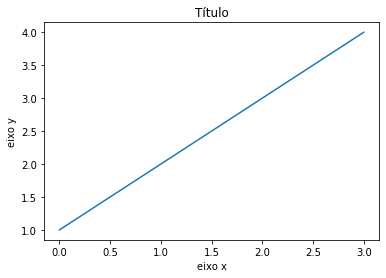

In [101]:
plt.plot([1, 2, 3, 4]) #plt.plot([1, 2, 3, 4],[0, 1, 2, 3])
#plt.plot([1, 2, 3, 4], 'ro')
plt.title('Título')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.show()

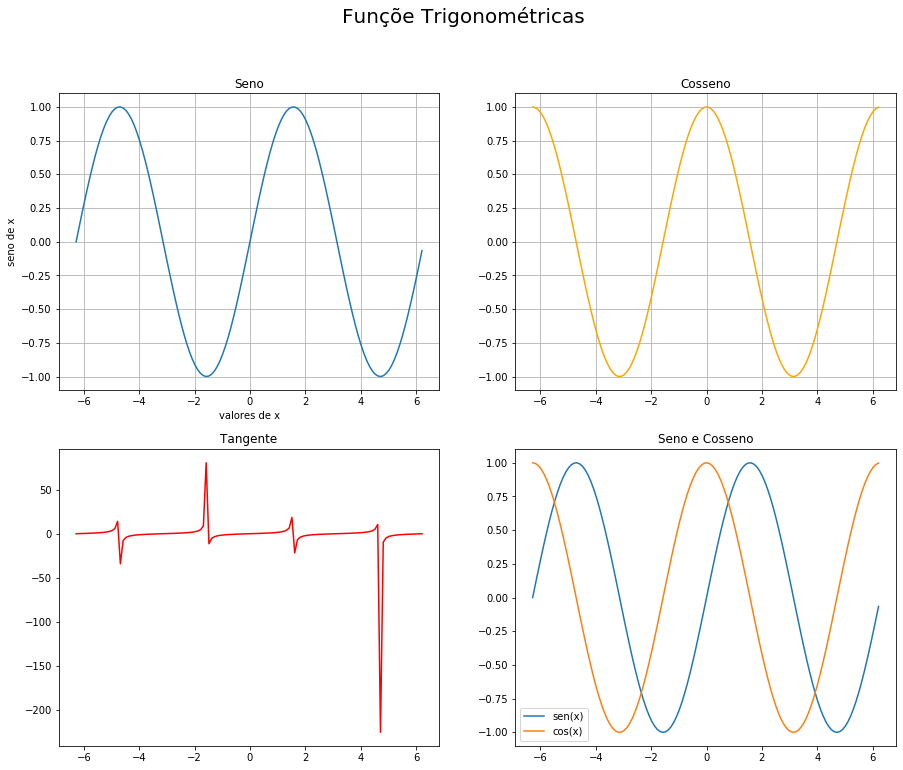

In [102]:
x = np.arange(-2*np.pi,2*np.pi,0.1)
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))
fig1.suptitle('Funçõe Trigonométricas', size=20)

f1_axes[0,0].plot(x, np.sin(x))
f1_axes[0,0].set_title('Seno')
f1_axes[0,0].set_xlabel('valores de x')
f1_axes[0,0].set_ylabel('seno de x')
f1_axes[0,0].grid()

f1_axes[0,1].plot(x, np.cos(x), color='orange')
f1_axes[0,1].set_title('Cosseno')
f1_axes[0,1].grid()

f1_axes[1,0].plot(x, np.tan(x), color='red')
f1_axes[1,0].set_title('Tangente')

f1_axes[1,1].plot(x, np.sin(x), label='sen(x)')
f1_axes[1,1].plot(x, np.cos(x), label='cos(x)')
f1_axes[1,1].set_title('Seno e Cosseno')
f1_axes[1,1].legend()

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


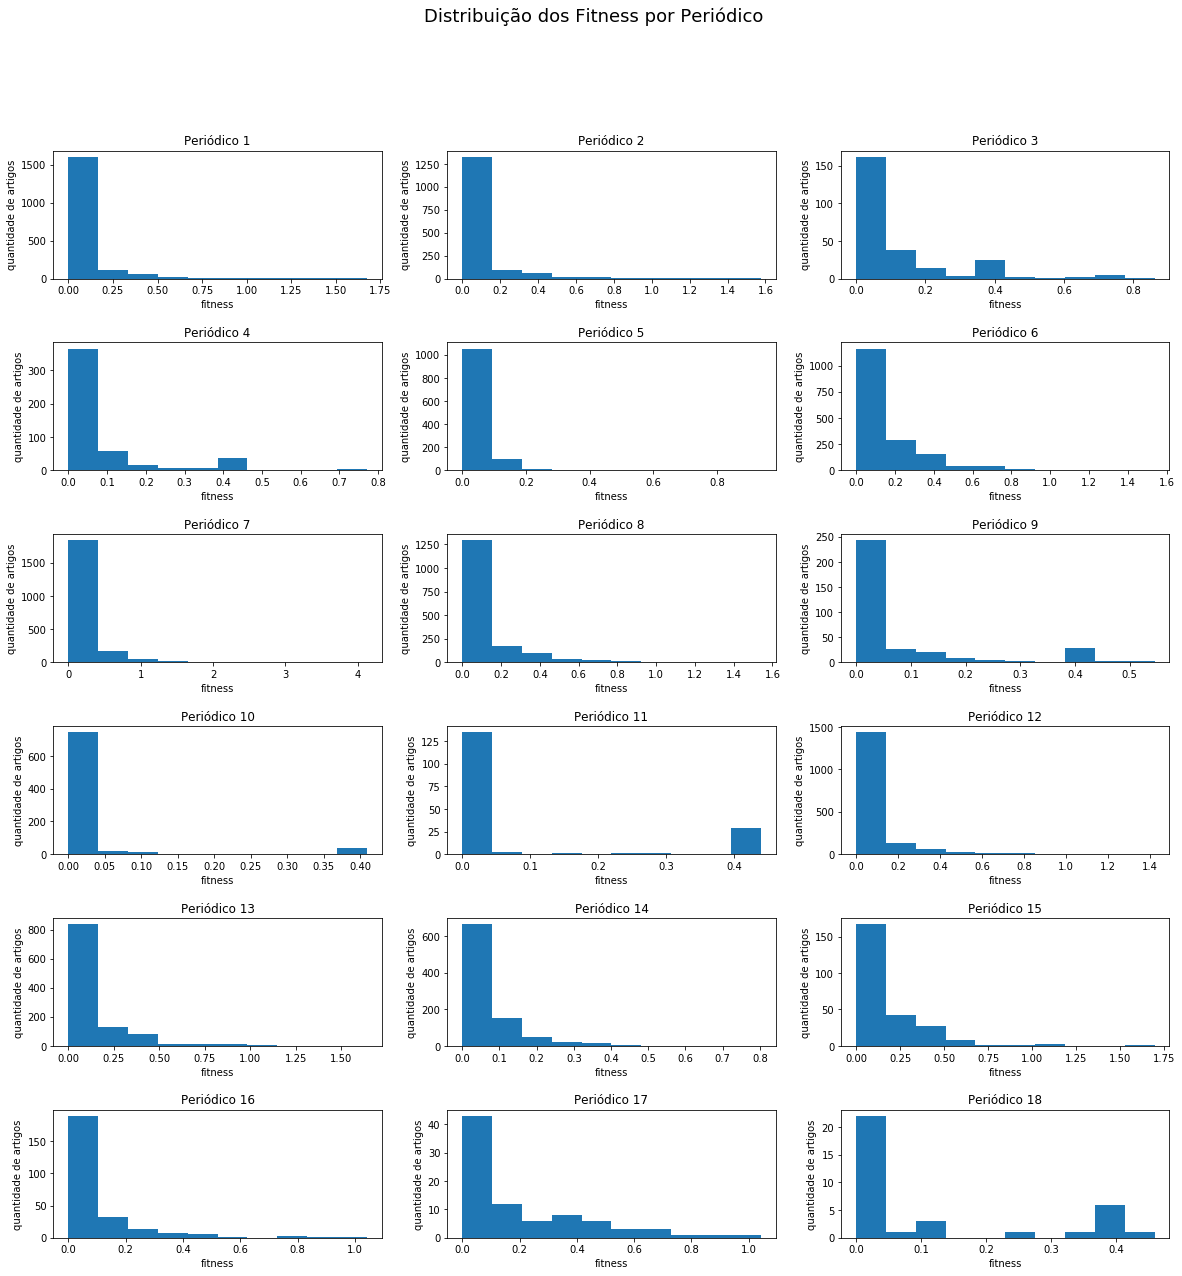

In [103]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=6, figsize=(20, 20))
fig1.suptitle('Distribuição dos Fitness por Periódico', size=18)
fig1.subplots_adjust(hspace=0.5)

k=0
for i in range(6):
    for j in range(3):
        k = k +1
        f1_axes[i,j].hist(df_param[df_param['id_j']==k].fitness)
        f1_axes[i,j].set_title('Periódico ' + str(k))
        f1_axes[i,j].set_xlabel('fitness')
        f1_axes[i,j].set_ylabel('quantidade de artigos')

plt.show()

* https://nbviewer.jupyter.org/github/anacwagner/scopus-scraping/blob/master/Análise%20dos%20Resultados%20-%20Lógica.ipynb